In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [31]:
#currently only 900 rows each. we can probably search for more niche terms similar to the 3 roles and add these roles inside the data files

data_eng = pd.read_csv('../src/output/data-engineer_28-03-2023.csv',encoding= 'unicode_escape')
data_sci = pd.read_csv('../src/output/data-science_27-03-2023.csv',encoding= 'unicode_escape')
data_an = pd.read_csv('../src/output/data-analyst_28-03-2023.csv',encoding= 'unicode_escape')
data_an.head()

,companyName,company_starRating,company_offeredRole,company_roleLocation,company_salary,listing_jobDesc,requested_url
0,J&T EXPRESS SINGAPORE PTE. LTD.,2.5,Junior Data Analyst,Singapore,3000 - 3000,"Collect and clean data from various sources, e...",https://www.glassdoor.sg/partner/jobListing.ht...
1,ATT DIGIVERSE PTE. LTD.,NaN,Data Analyst [Junior],Singapore,4000 - 6000,Work with business users and data platform tea...,https://www.glassdoor.sg/partner/jobListing.ht...
2,TRUST RECRUIT PTE. LTD.,5.0,"Data Analyst ( Data Modeling , Data Analysis ,...",Singapore,5000 - 6000,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...
3,ARYAN SOLUTIONS PTE. LTD.,4.2,Junior Data Analyst,Singapore,4000 - 8000,Place client value and human experience at the...,https://www.glassdoor.sg/partner/jobListing.ht...
4,TRUST RECRUIT PTE. LTD.,5.0,Data Analyst (Tableau/ PowerBI/ R/ Python/ In ...,Singapore,5000 - 6000,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...


In [32]:
data_eng['y_role'] = 'data_engineer'
data_sci['y_role'] = 'data_science'
data_an['y_role'] = 'data_analyst'

data_an.head()


,companyName,company_starRating,company_offeredRole,company_roleLocation,company_salary,listing_jobDesc,requested_url,y_role
0,J&T EXPRESS SINGAPORE PTE. LTD.,2.5,Junior Data Analyst,Singapore,3000 - 3000,"Collect and clean data from various sources, e...",https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
1,ATT DIGIVERSE PTE. LTD.,NaN,Data Analyst [Junior],Singapore,4000 - 6000,Work with business users and data platform tea...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
2,TRUST RECRUIT PTE. LTD.,5.0,"Data Analyst ( Data Modeling , Data Analysis ,...",Singapore,5000 - 6000,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
3,ARYAN SOLUTIONS PTE. LTD.,4.2,Junior Data Analyst,Singapore,4000 - 8000,Place client value and human experience at the...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst
4,TRUST RECRUIT PTE. LTD.,5.0,Data Analyst (Tableau/ PowerBI/ R/ Python/ In ...,Singapore,5000 - 6000,Provide data analysis and insights to Product ...,https://www.glassdoor.sg/partner/jobListing.ht...,data_analyst


In [33]:
#Average company salary based on the range,and fill NA with average of each job type

def fn(x):
    if x == 0 :
        return 0
    else:
        s = x.split(' - ')
        s = sum(map(int,s))/len(s)
        return s

data_eng['company_salary'] = data_eng['company_salary'] .replace(np.nan,0)
data_sci['company_salary'] = data_sci['company_salary'] .replace(np.nan,0)
data_an['company_salary'] = data_an['company_salary'] .replace(np.nan,0)
data_eng['company_salary'] = data_eng['company_salary'].apply(fn)
data_sci['company_salary'] = data_sci['company_salary'].apply(fn)
data_an['company_salary'] = data_an['company_salary'].apply(fn)

#get average based on job type
#data_eng_avg = data_eng['company_salary'].mean()
#data_sci_avg = data_sci['company_salary'].mean()
#data_an_avg = data_an['company_salary'].mean()
#data_eng['company_salary'] = data_eng['company_salary'] .replace(0,data_eng_avg)
#data_sci['company_salary'] = data_sci['company_salary'] .replace(0,data_sci_avg)
#data_an['company_salary'] = data_an['company_salary'] .replace(0,data_an_avg)

data_raw1 = data_eng.append(data_sci).append(data_an)


In [34]:
data_raw1['listing_jobDesc'][0].values

array(['Maintain, build and iteratively improve existing data pipelines. In time your duties will grow to include the design and implementation of new data pipelines as needs evolve. Write advanced and efficient code for use in data pipelines and data processing, preferably in Python. Write advanced SQL code for use in databases with multi-million to billion-row tables Perform system administrative tasks on Linux machines and various database systems. Work closely with internal I.T. and Dev teams throughout the process of planning, building, and deployment of new data assets. Test, optimize, troubleshoot and fine-tune database queries for maximum efficiency. Work with various internal departments to gather requirements and provide solutions Develop custom solutions to meet the ever-growing need for data within the organization. Bachelors in Computer Science, Information Systems or related field or equivalent work experience 3 or more years of work experience in SQL and/or data architec

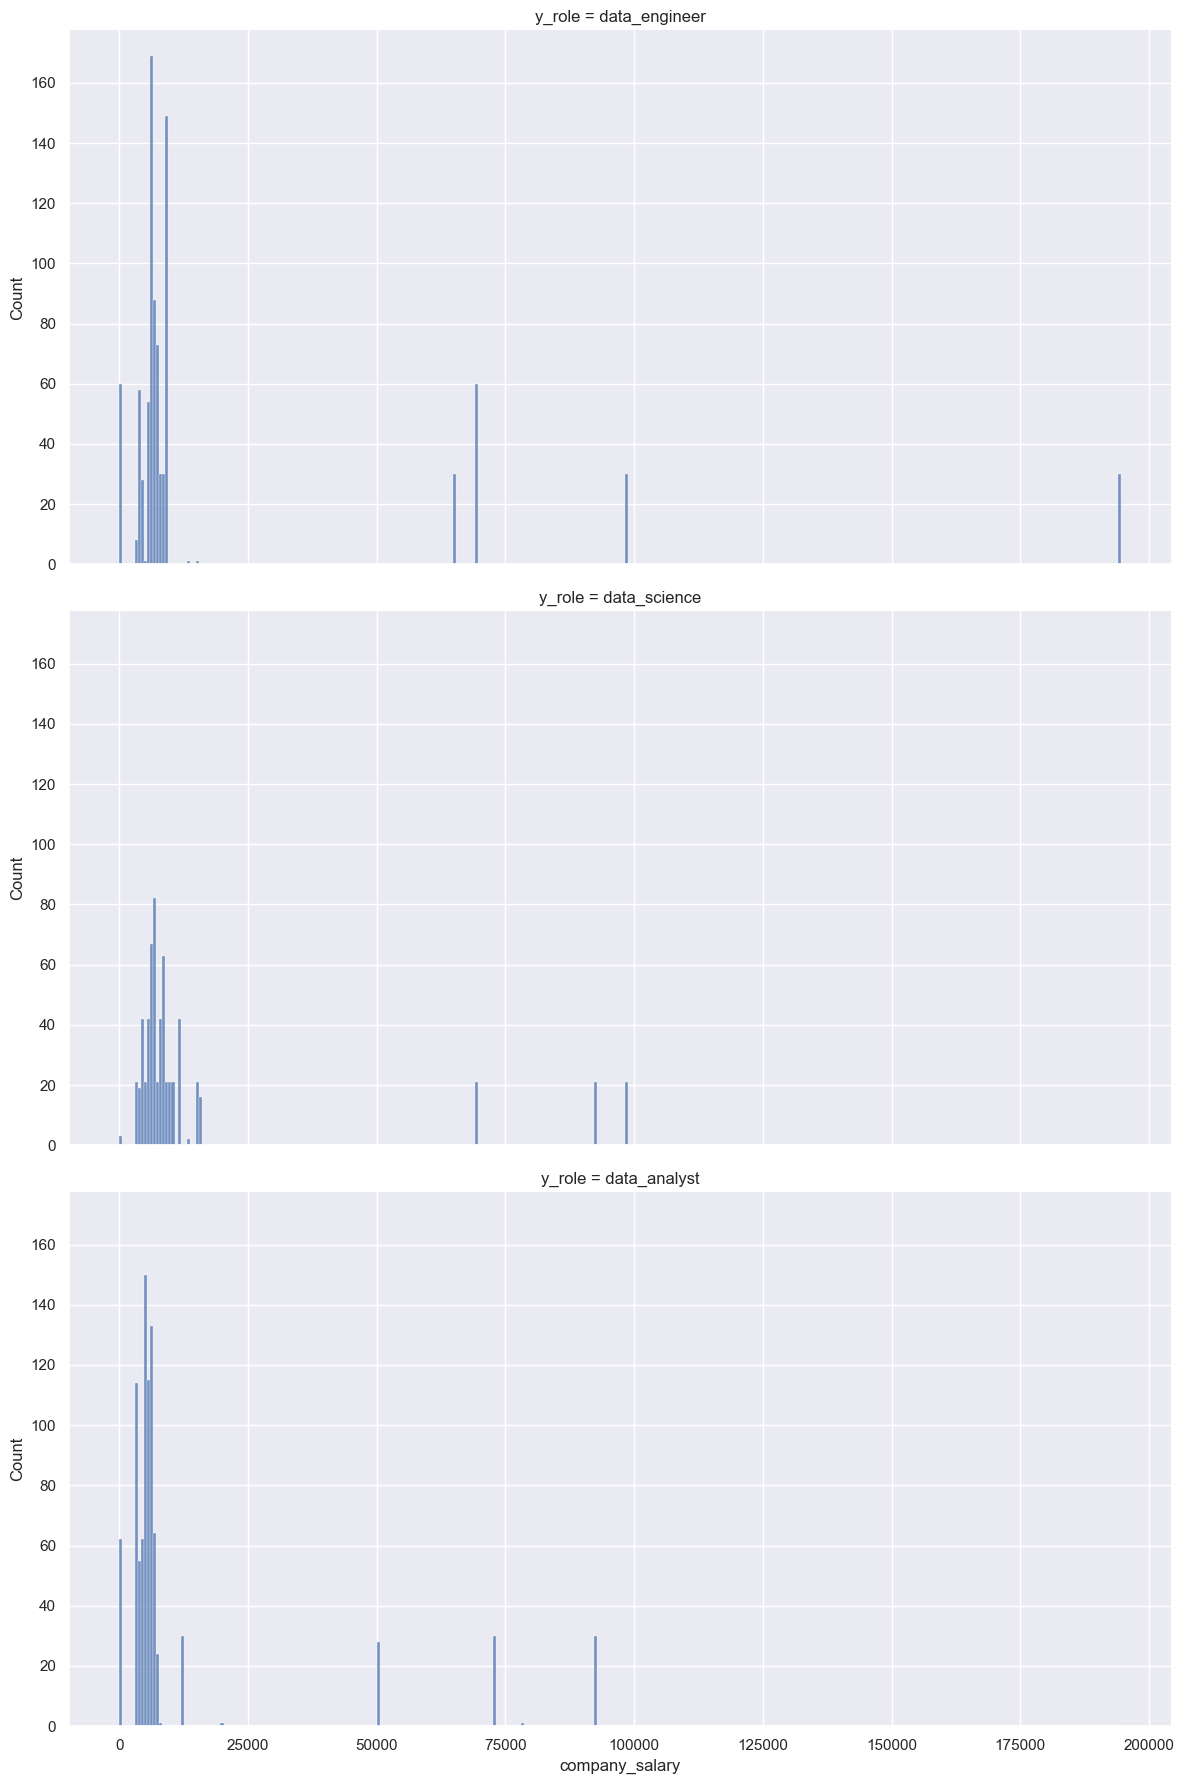

In [7]:
sns.set(rc={'figure.figsize':(15,25)})
sns.displot(data = data_raw1,x = 'company_salary',row = 'y_role',height = 6,aspect=2)
plt.show()

In [8]:
#get average based on job type
data_eng_avg = data_eng['company_salary'].mean()
data_sci_avg = data_sci['company_salary'].mean()
data_an_avg = data_an['company_salary'].mean()
data_eng['company_salary'] = data_eng['company_salary'] .replace(0,data_eng_avg)
data_sci['company_salary'] = data_sci['company_salary'] .replace(0,data_sci_avg)
data_an['company_salary'] = data_an['company_salary'] .replace(0,data_an_avg)

data_raw = deepcopy(data_raw1)

data_raw['listing_jobDesc'][0].values

array(['Maintain, build and iteratively improve existing data pipelines. In time your duties will grow to include the design and implementation of new data pipelines as needs evolve. Write advanced and efficient code for use in data pipelines and data processing, preferably in Python. Write advanced SQL code for use in databases with multi-million to billion-row tables Perform system administrative tasks on Linux machines and various database systems. Work closely with internal I.T. and Dev teams throughout the process of planning, building, and deployment of new data assets. Test, optimize, troubleshoot and fine-tune database queries for maximum efficiency. Work with various internal departments to gather requirements and provide solutions Develop custom solutions to meet the ever-growing need for data within the organization. Bachelors in Computer Science, Information Systems or related field or equivalent work experience 3 or more years of work experience in SQL and/or data architec

C:\Users\JeeJoo\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:244: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


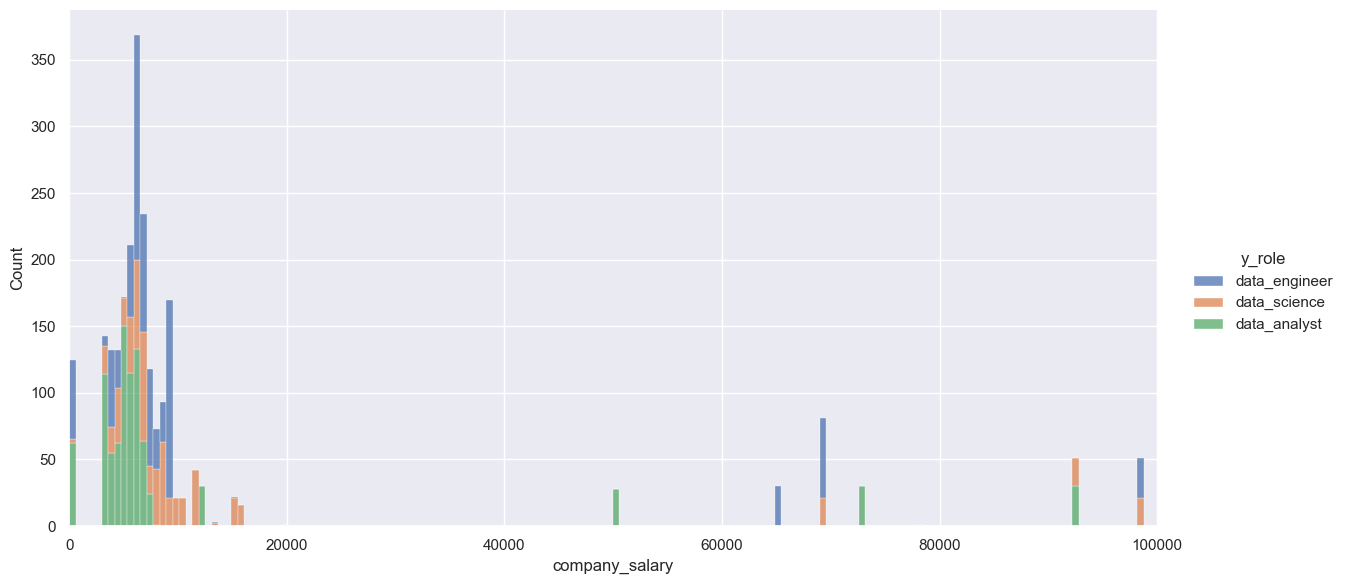

In [9]:
#plot with new data replacing 0 with average of job that we have
sns.displot(data = data_raw,x = 'company_salary',hue = 'y_role',height = 6,aspect=2,multiple='stack')
plt.xlim(0,100000)
plt.show()

In [60]:
def is_valid_date(date_str): # sub function
    try:
        parser.parse(date_str)
        return True
    except:
        return False
    
def date_removal(data):
    new_list = [' '.join([w for w in line.split() if not is_valid_date(w)]) for line in data]
    return (new_list[0])

def stemmer_and_stopWord(doc):    
    doc= nlp(doc)
    token_list = []
    for token in doc:
      lemma = token.lemma_
      if lemma == '-PRON-' or lemma == 'be':
        lemma = token.text
      token_list.append(lemma)

    stemmed = token_list
    
    # Create list of word tokens after removing stopwords
    
    filtered_sentence =[] 
    for word in stemmed:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    return (' '.join(filtered_sentence))

def normaliz(filtered_sentence):
        
    words = [str(word).lower() for word in filtered_sentence.split()]
    return  ' '.join(words[:100])

# For number removal ~

def numbers_removal(data):
    s = [data]
    result = ''.join([i for i in s if not i.isdigit()])
    return (result)
# For punchuation & double white spaces ~

def punch_removal(words):
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in [words]]
    return re.sub(' +', ' ', stripped[0])


def cleaner(data):
    string = [data]
    string = date_removal(string)
    #string = numbers_removal(string)
    string = punch_removal(string)
    string = stemmer_and_stopWord(string)
    #string = normaliz(string)
    return string

Text processing referenced from https://www.kaggle.com/code/adarshsng/predicting-job-type-cat-using-job-description#Modeling-:---%3E

In [11]:
#! pip install langdetect
#! pip install translate
#! pip install gensim
#! python -m spacy download en_core_web_lg

In [12]:
import spacy.cli
#spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

In [13]:
#text processing
from dateutil import parser
import string
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from spacy.lang.en.stop_words import STOP_WORDS

from gensim.models import KeyedVectors

## for language detection
## warnings !!
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JeeJoo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JeeJoo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
data_types_dict = {'companyName':str,'company_starRating':float,'company_offeredRole':str,'company_roleLocation':str,'company_salary':float,'listing_jobDesc':str,'requested_url':str,'y_role':str}
data_raw.dtypes
data_raw = data_raw.astype(data_types_dict)
#data_raw.dtypes
#data_raw['listing_jobDesc']
data_raw['listing_jobDesc'][0].values

array(['Maintain, build and iteratively improve existing data pipelines. In time your duties will grow to include the design and implementation of new data pipelines as needs evolve. Write advanced and efficient code for use in data pipelines and data processing, preferably in Python. Write advanced SQL code for use in databases with multi-million to billion-row tables Perform system administrative tasks on Linux machines and various database systems. Work closely with internal I.T. and Dev teams throughout the process of planning, building, and deployment of new data assets. Test, optimize, troubleshoot and fine-tune database queries for maximum efficiency. Work with various internal departments to gather requirements and provide solutions Develop custom solutions to meet the ever-growing need for data within the organization. Bachelors in Computer Science, Information Systems or related field or equivalent work experience 3 or more years of work experience in SQL and/or data architec

In [15]:
#focusing on job description !!!

# Steps to be taken :
#
#     1. Text pre-processing:
#         1.1 Normalize case
#         1.2 Special character
#         1.3 Stop words
#         1.4 White space
#         1.5 Stemming
        
#     2. Feature extraction:
#         2.1 Word2vec embedding

In [16]:
print('* --------------- for raw data --------------- *')

lst=[]
for i in data_raw['listing_jobDesc']: # cleansing !!
    lst.append(cleaner(i))

data_raw['listing_jobDesc']=pd.Series(lst) # updating the attributee !!

#print('* --------------- for test data --------------- *')

#list=[]
#for i in test['job_description']: # cleansing !!
#    list.append(cleaner(i))

#test['job_description']=pd.Series(list) # updating the attributee !!

* --------------- for raw data --------------- *


In [17]:
data_raw['listing_jobDesc'][0].values

array(['maintain build iteratively improve exist datum pipeline time duty grow include design implementation new data pipeline need evolve write advanced efficient code use data pipeline datum processing preferably Python write advanced SQL code use database multimillion billionrow table perform system administrative task Linux machine database system work closely internal Dev team process planning building deployment new data asset Test optimize troubleshoot finetune database query maximum efficiency work',
       'maintain build iteratively improve exist datum pipeline time duty grow include design implementation new data pipeline need evolve write advanced efficient code use data pipeline datum processing preferably Python write advanced SQL code use database multimillion billionrow table perform system administrative task Linux machine database system work closely internal Dev team process planning building deployment new data asset Test optimize troubleshoot finetune database quer

* ------------------------- for train data-------------------------------- *


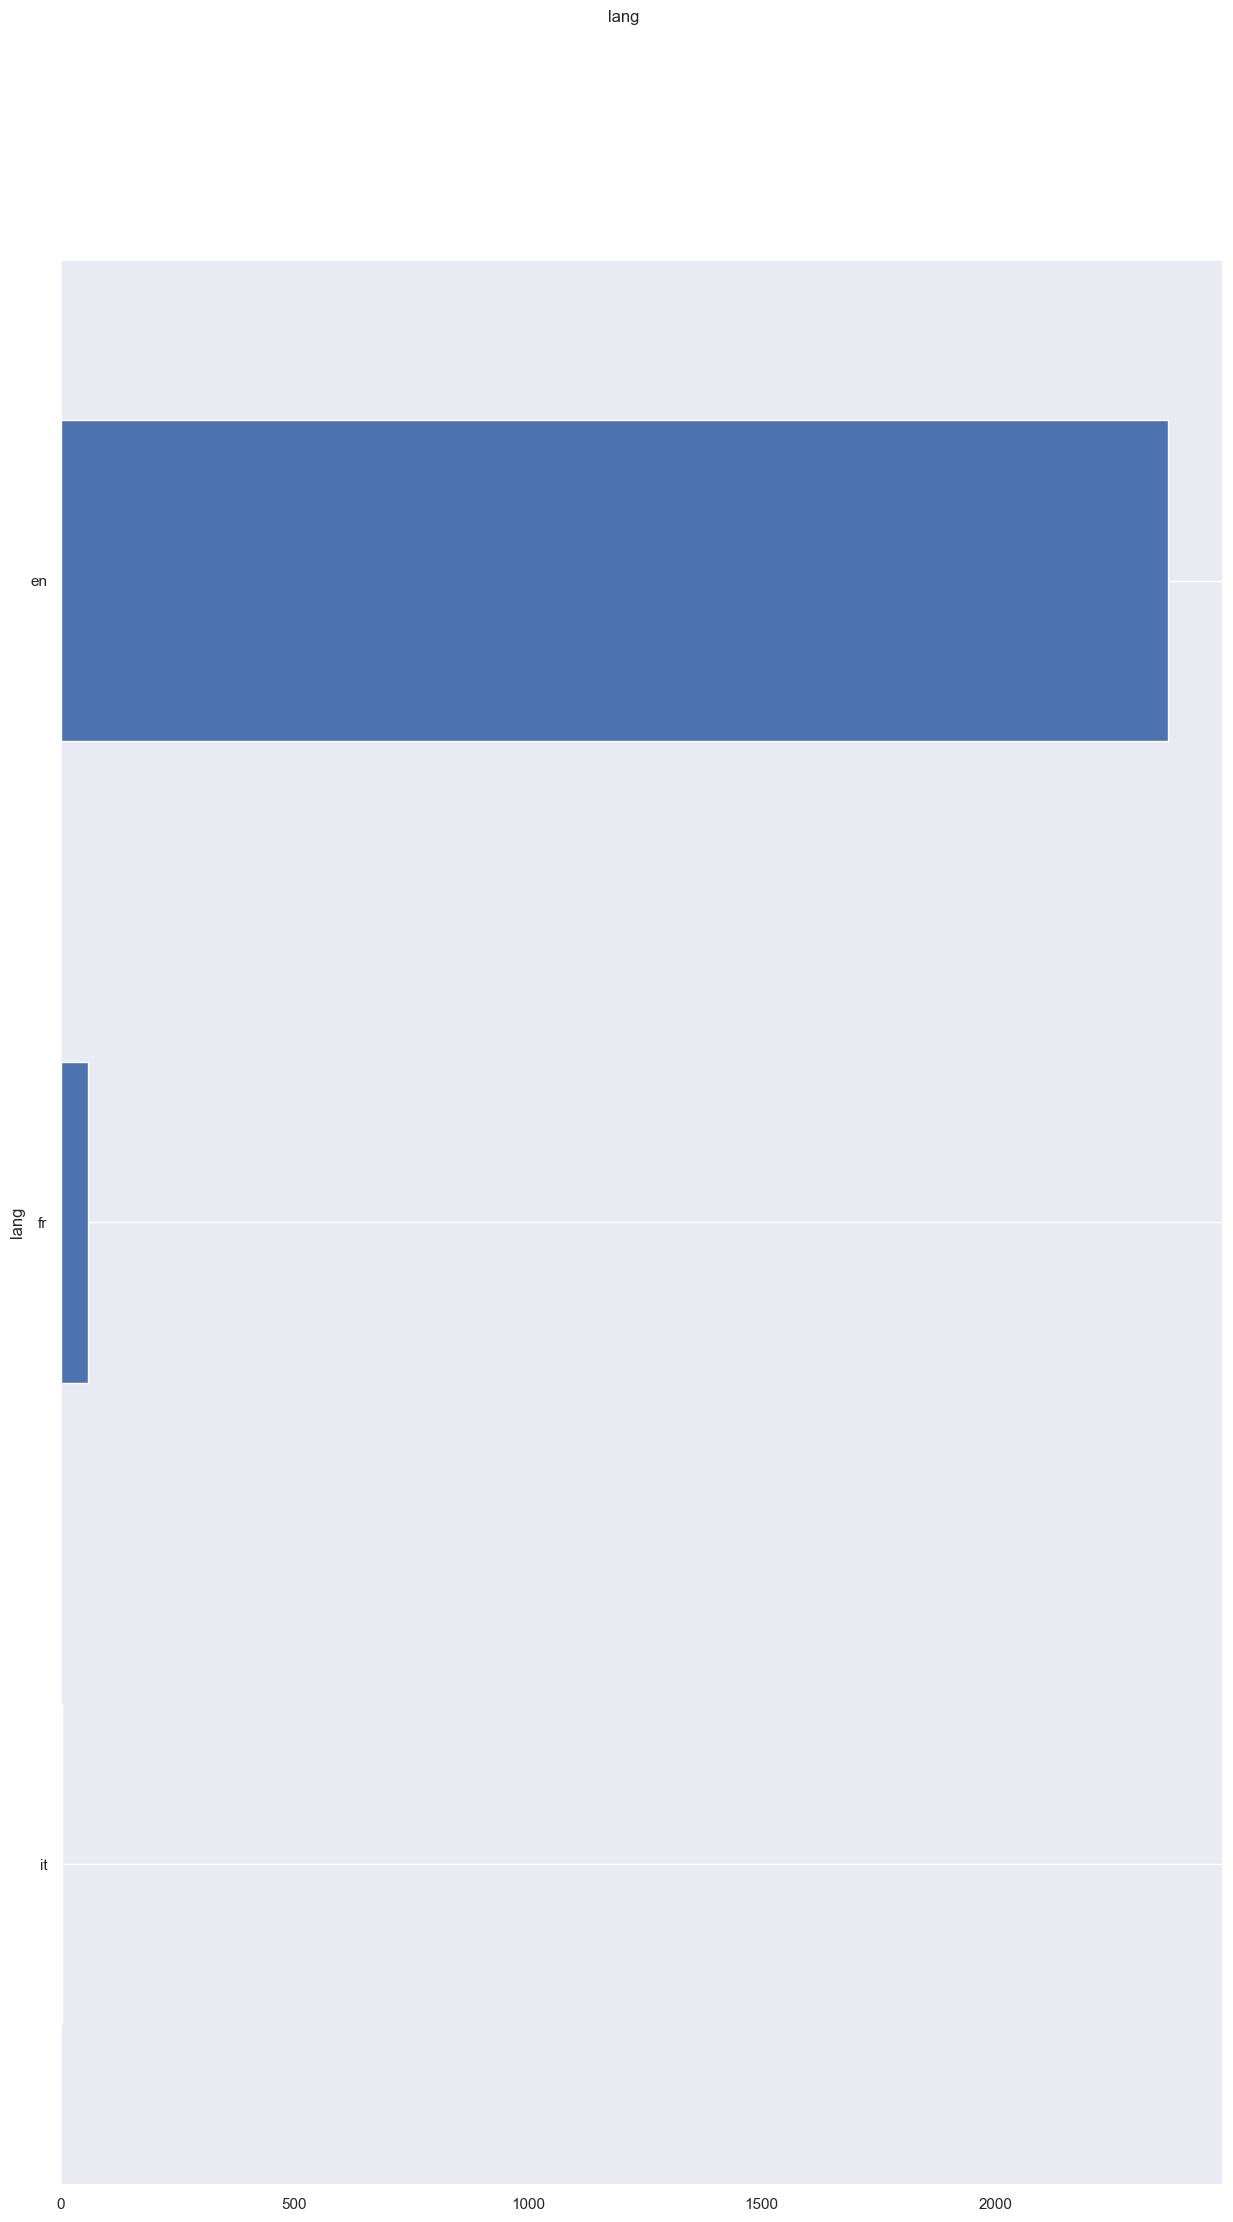

In [18]:
# adding a new attribute for differencing the language of teh 'job_description' !!
import langdetect

print('* ------------------------- for train data-------------------------------- *')

data_raw['lang'] = data_raw["listing_jobDesc"].apply(lambda x: langdetect.detect(x) if x.strip() != "" else "")

fig, ax = plt.subplots()
fig.suptitle('lang', fontsize=12)

data_raw['lang'].reset_index().groupby('lang').count().sort_values(by= "index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
plt.show()

#print('* -------------------------- for test data ------------------------------- *')

#test['lang'] = test["job_description"].apply(lambda x: langdetect.detect(x) if x.strip() != "" else "")

#fig, ax = plt.subplots()
#fig.suptitle('lang', fontsize=12)
#test['lang'].reset_index().groupby('lang').count().sort_values(by= "index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
#plt.show()

In [19]:
# Feature Extraction from the job discription :

print('* ------------------------- for train data-------------------------------- *')

# the relevance of these feature will be tested on the later stages !!

data_raw['word_count'] = data_raw["listing_jobDesc"].apply(lambda x: 
                                                     len(str(x).split(" ")))
data_raw['char_count'] = data_raw["listing_jobDesc"].apply(lambda x:
                                                     sum(len(word) 
                                                     for word in str(x).split(" ")))
data_raw['sentence_count'] = data_raw["listing_jobDesc"].apply(lambda x: 
                                                         len(str(x).split(".")))
data_raw['avg_word_length'] = data_raw['char_count'] / data_raw['word_count']
data_raw['avg_sentence_lenght'] = data_raw['word_count'] / data_raw['sentence_count']

#print('* ------------------------- for test data-------------------------------- *')

#test['word_count'] = test["job_description"].apply(lambda x: 
                                                   #len(str(x).split(" ")))
#test['char_count'] = test["job_description"].apply(lambda x: 
                                                   #sum(len(word) 
                                                   #for word in str(x).split(" ")))
#test['sentence_count'] = test["job_description"].apply(lambda x: 
                                                    #len(str(x).split(".")))
#test['avg_word_length'] = test['char_count'] / test['word_count']
#test['avg_sentence_lenght'] = test['word_count'] / test['sentence_count']

* ------------------------- for train data-------------------------------- *


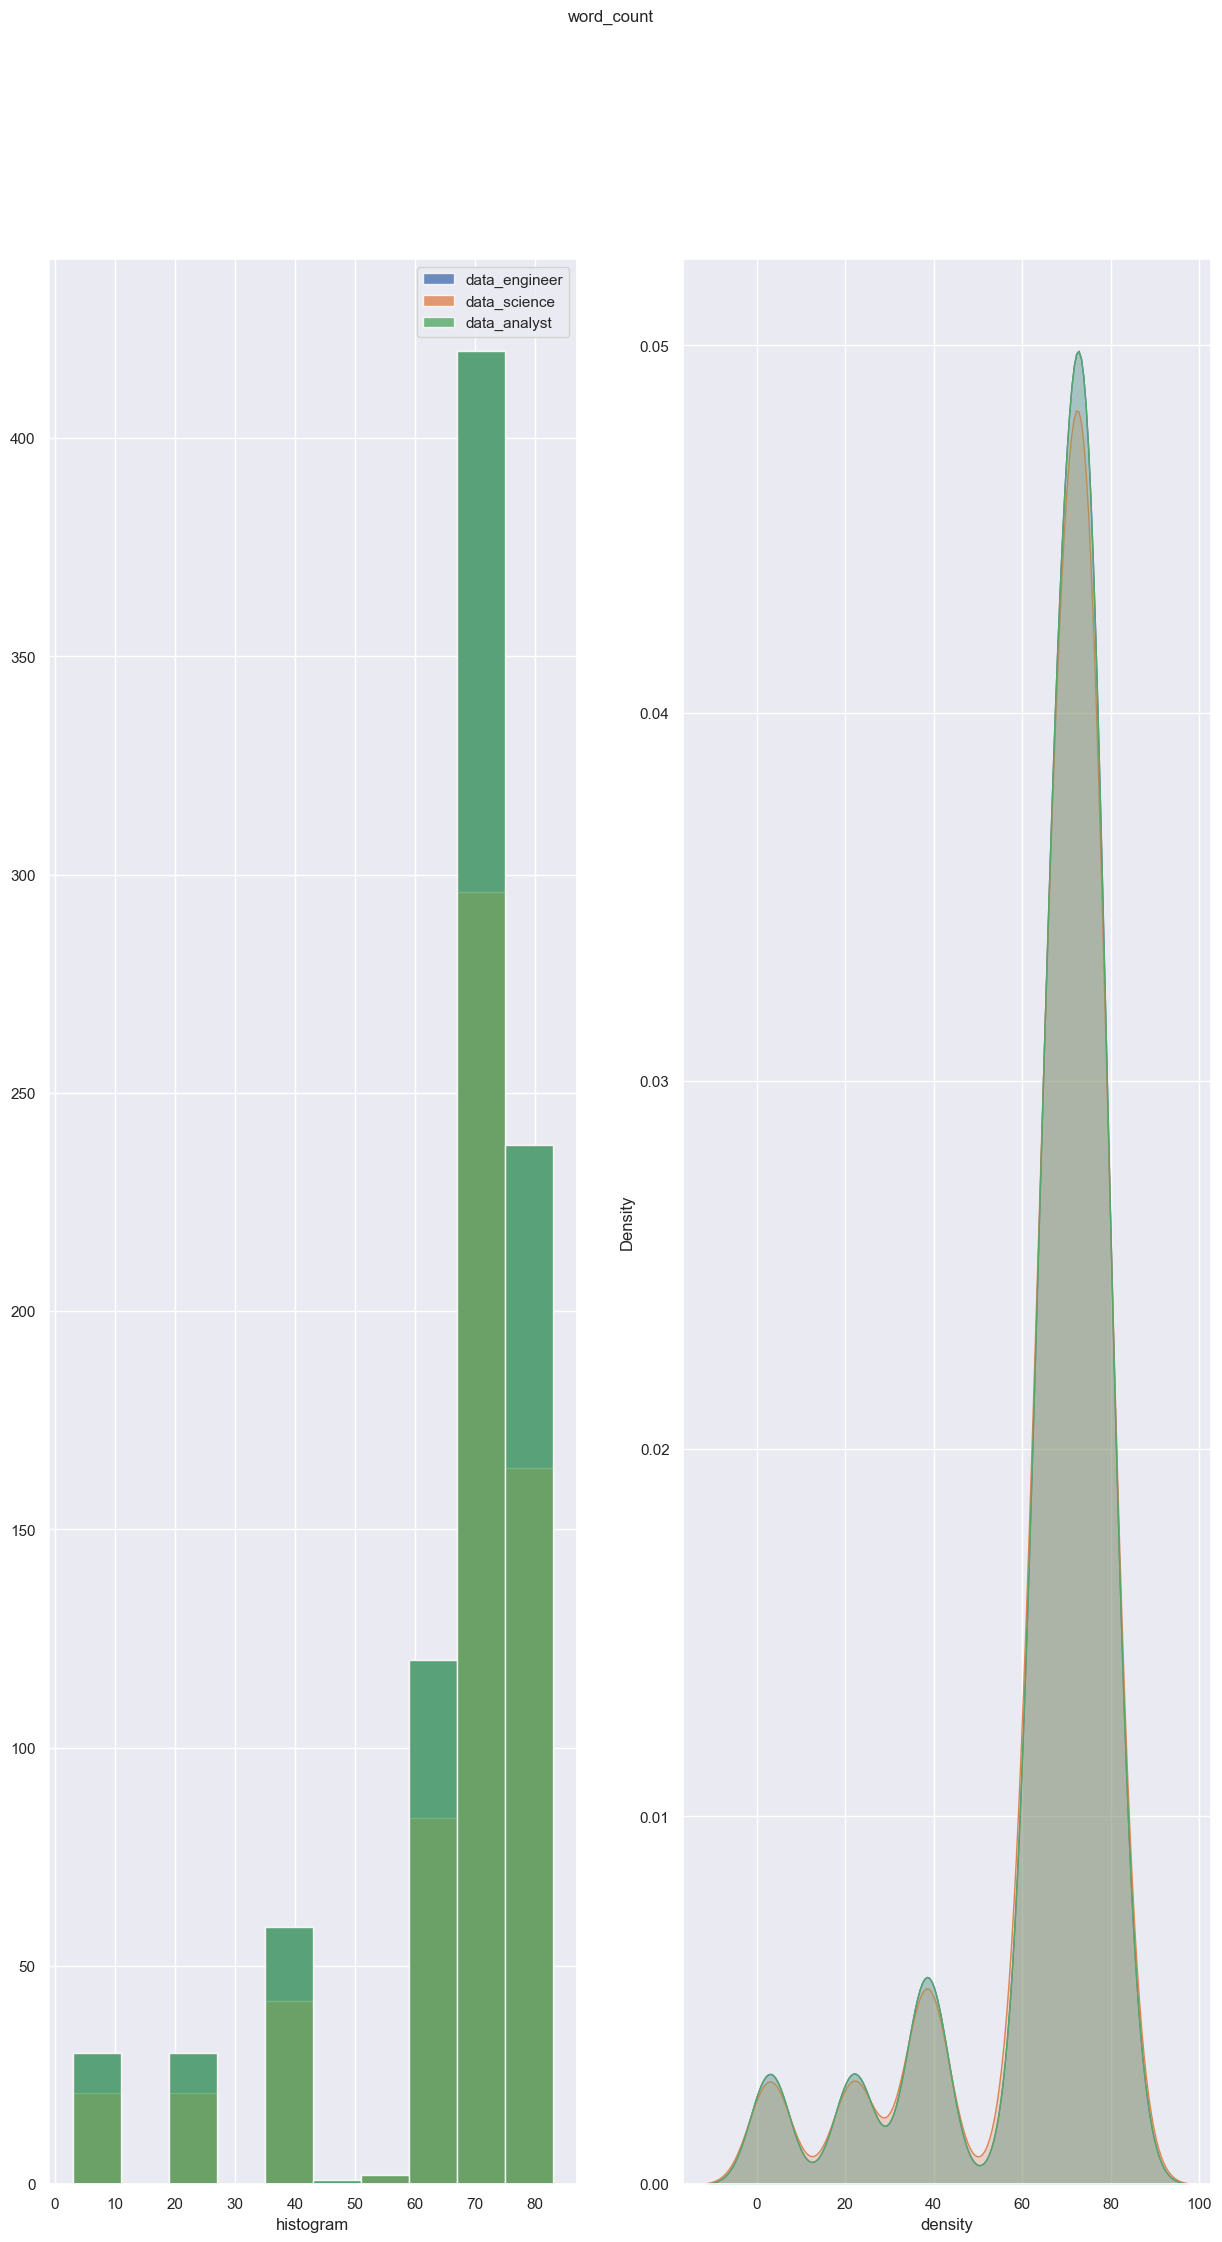

In [20]:
# A bivariate distributions to look at the correlation of a attribute with the target class !!

## conclusion : The categories have a similar length distribution but the samples have different sizes.

x = 'word_count'
y = 'y_role'

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in data_raw[y].unique():
    sns.distplot(data_raw[data_raw[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(data_raw[data_raw[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(data_raw[y].unique())
ax[1].grid(True)
plt.show()

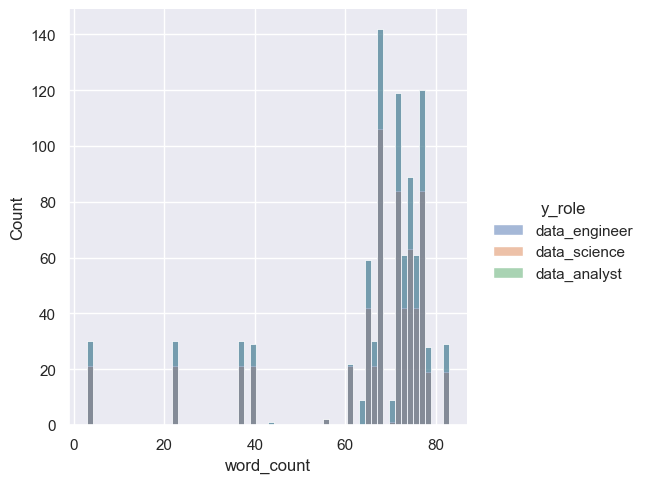

In [21]:
x = 'word_count'
y = 'y_role'
sns.displot(data_raw, x = x, hue = 'y_role')
plt.show()

In [ ]:
import re
data_raw['clean_job_desc']=data_raw['listing_jobDesc'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
data_raw['clean_job_desc'] = data_raw['clean_job_desc'].apply(lambda x: re.sub(r'\d+', '', x))
data_raw['tokens'] = data_raw['clean_job_desc'].apply(lambda x: x.split())
#data_raw['clean_job_desc']

In [23]:
from collections import Counter
data_raw['word_count'] = data_raw['tokens'].apply(lambda x: Counter(x))
data_raw.head()
df = data_raw[['y_role','word_count']].copy()

dff = pd.DataFrame(columns = ['JobType','Word','Frequency'])

for index, row in df.iterrows():
    job_type = row['y_role']
    word_dict = row['word_count']
    for w,f in word_dict.items():
        dff = dff.append({'JobType':job_type,'Word':w,'Frequency':f},ignore_index=True)

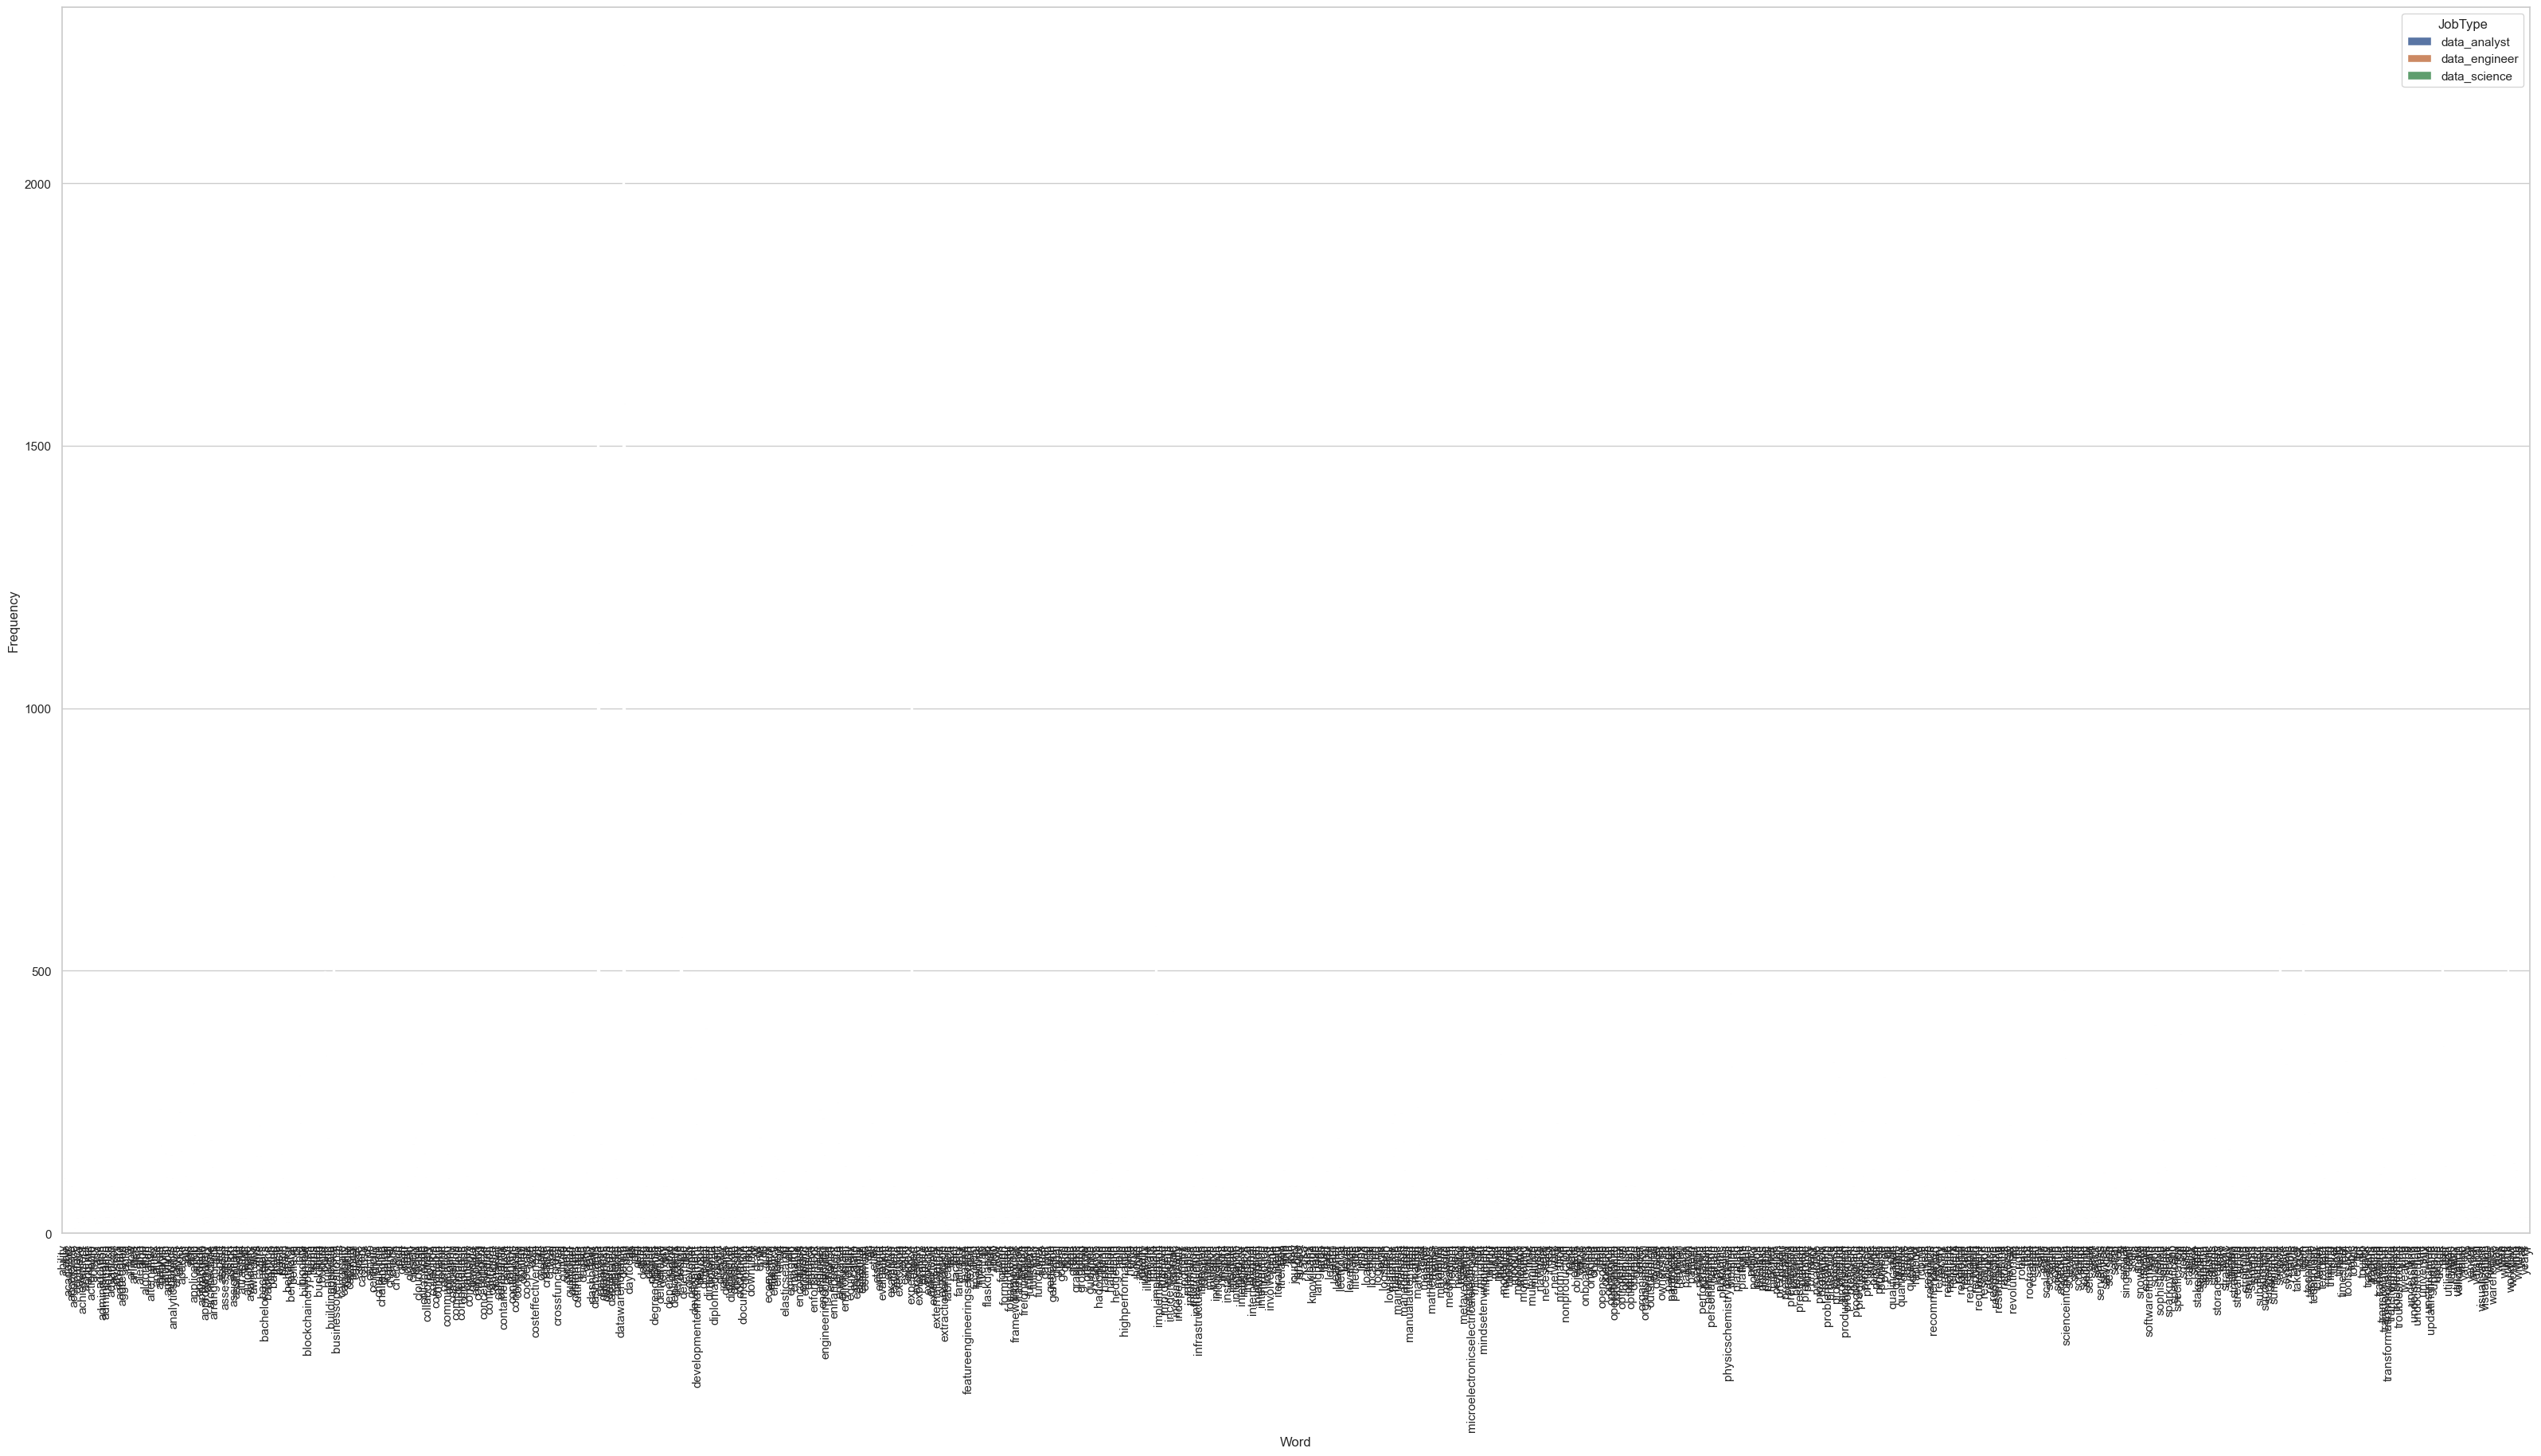

In [24]:
#group and sum frequency
grouped_data = dff.groupby(['JobType', 'Word'], as_index=False)['Frequency'].sum()

sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))
sns.barplot(x='Word', y='Frequency', hue='JobType', data=grouped_data)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [70]:
#try grouping by key words
###
###
data_r = deepcopy(data_raw1)
data_r.head()

skills_lst = ['sql','python','nosql','postgresql','redshift','athena','tableau','power bi','excel','data visualization','dashboards','machine learning','scala','java','javascript','html','c++','hive','aws','tensorflow','pytorch','flask','plumber','ai','keras','matlab','data scraping',
              'nlp','powerpoint','etl','azure','linux','spark','hadoop','docker','kubernetes','numpy','postgresql','query']

#print('* --------------- for raw data --------------- *')
#lst=[]
#for i in data_raw['listing_jobDesc']: # cleansing !!
#    lst.append(cleaner(i))
#data_r['listing_jobDesc']=pd.Series(lst) # updating the attributee !!


In [71]:
data_types_dict = {'companyName':str,'company_starRating':float,'company_offeredRole':str,'company_roleLocation':str,'company_salary':float,'listing_jobDesc':str,'requested_url':str,'y_role':str}
data_r.dtypes
data_r = data_r.astype(data_types_dict)

#lst=[]
#for i in data_r['listing_jobDesc']:
#    lst.append(cleaner(i))
#data_r['listed_desc'] = pd.Series(lst)


In [85]:
def count_keywords(description):
    keyword_counts = {}
    for keyword in skills_lst:
        count = description.lower().count(keyword)
        keyword_counts[keyword] = count
    return keyword_counts

data_r['clean_job_desc']=data_r['listing_jobDesc'].apply(lambda x: re.sub(r'[^\w\s]-', ' ', x.lower()))
data_r['clean_job_desc'] = data_r['clean_job_desc'].apply(lambda x: re.sub(r'\d+', ' ', x))

data_r['key_counts'] = data_r['clean_job_desc'].apply(count_keywords)
data_r['listing_jobDesc'][0].values

data_r['clean_job_desc'][0].values
#data_r.head()

array(['maintain, build and iteratively improve existing data pipelines. in time your duties will grow to include the design and implementation of new data pipelines as needs evolve. write advanced and efficient code for use in data pipelines and data processing, preferably in python. write advanced sql code for use in databases with multi-million to billion-row tables perform system administrative tasks on linux machines and various database systems. work closely with internal i.t. and dev teams throughout the process of planning, building, and deployment of new data assets. test, optimize, troubleshoot and fine-tune database queries for maximum efficiency. work with various internal departments to gather requirements and provide solutions develop custom solutions to meet the ever-growing need for data within the organization. bachelors in computer science, information systems or related field or equivalent work experience   or more years of work experience in sql and/or data architec

In [86]:
dff2 = pd.DataFrame(columns = ['JobType','Word','Frequency'])

for index, row in data_r.iterrows():
    job_type = row['y_role']
    word_dict = row['key_counts']
    for w,f in word_dict.items():
        dff2 = dff2.append({'JobType':job_type,'Word':w,'Frequency':f},ignore_index=True)

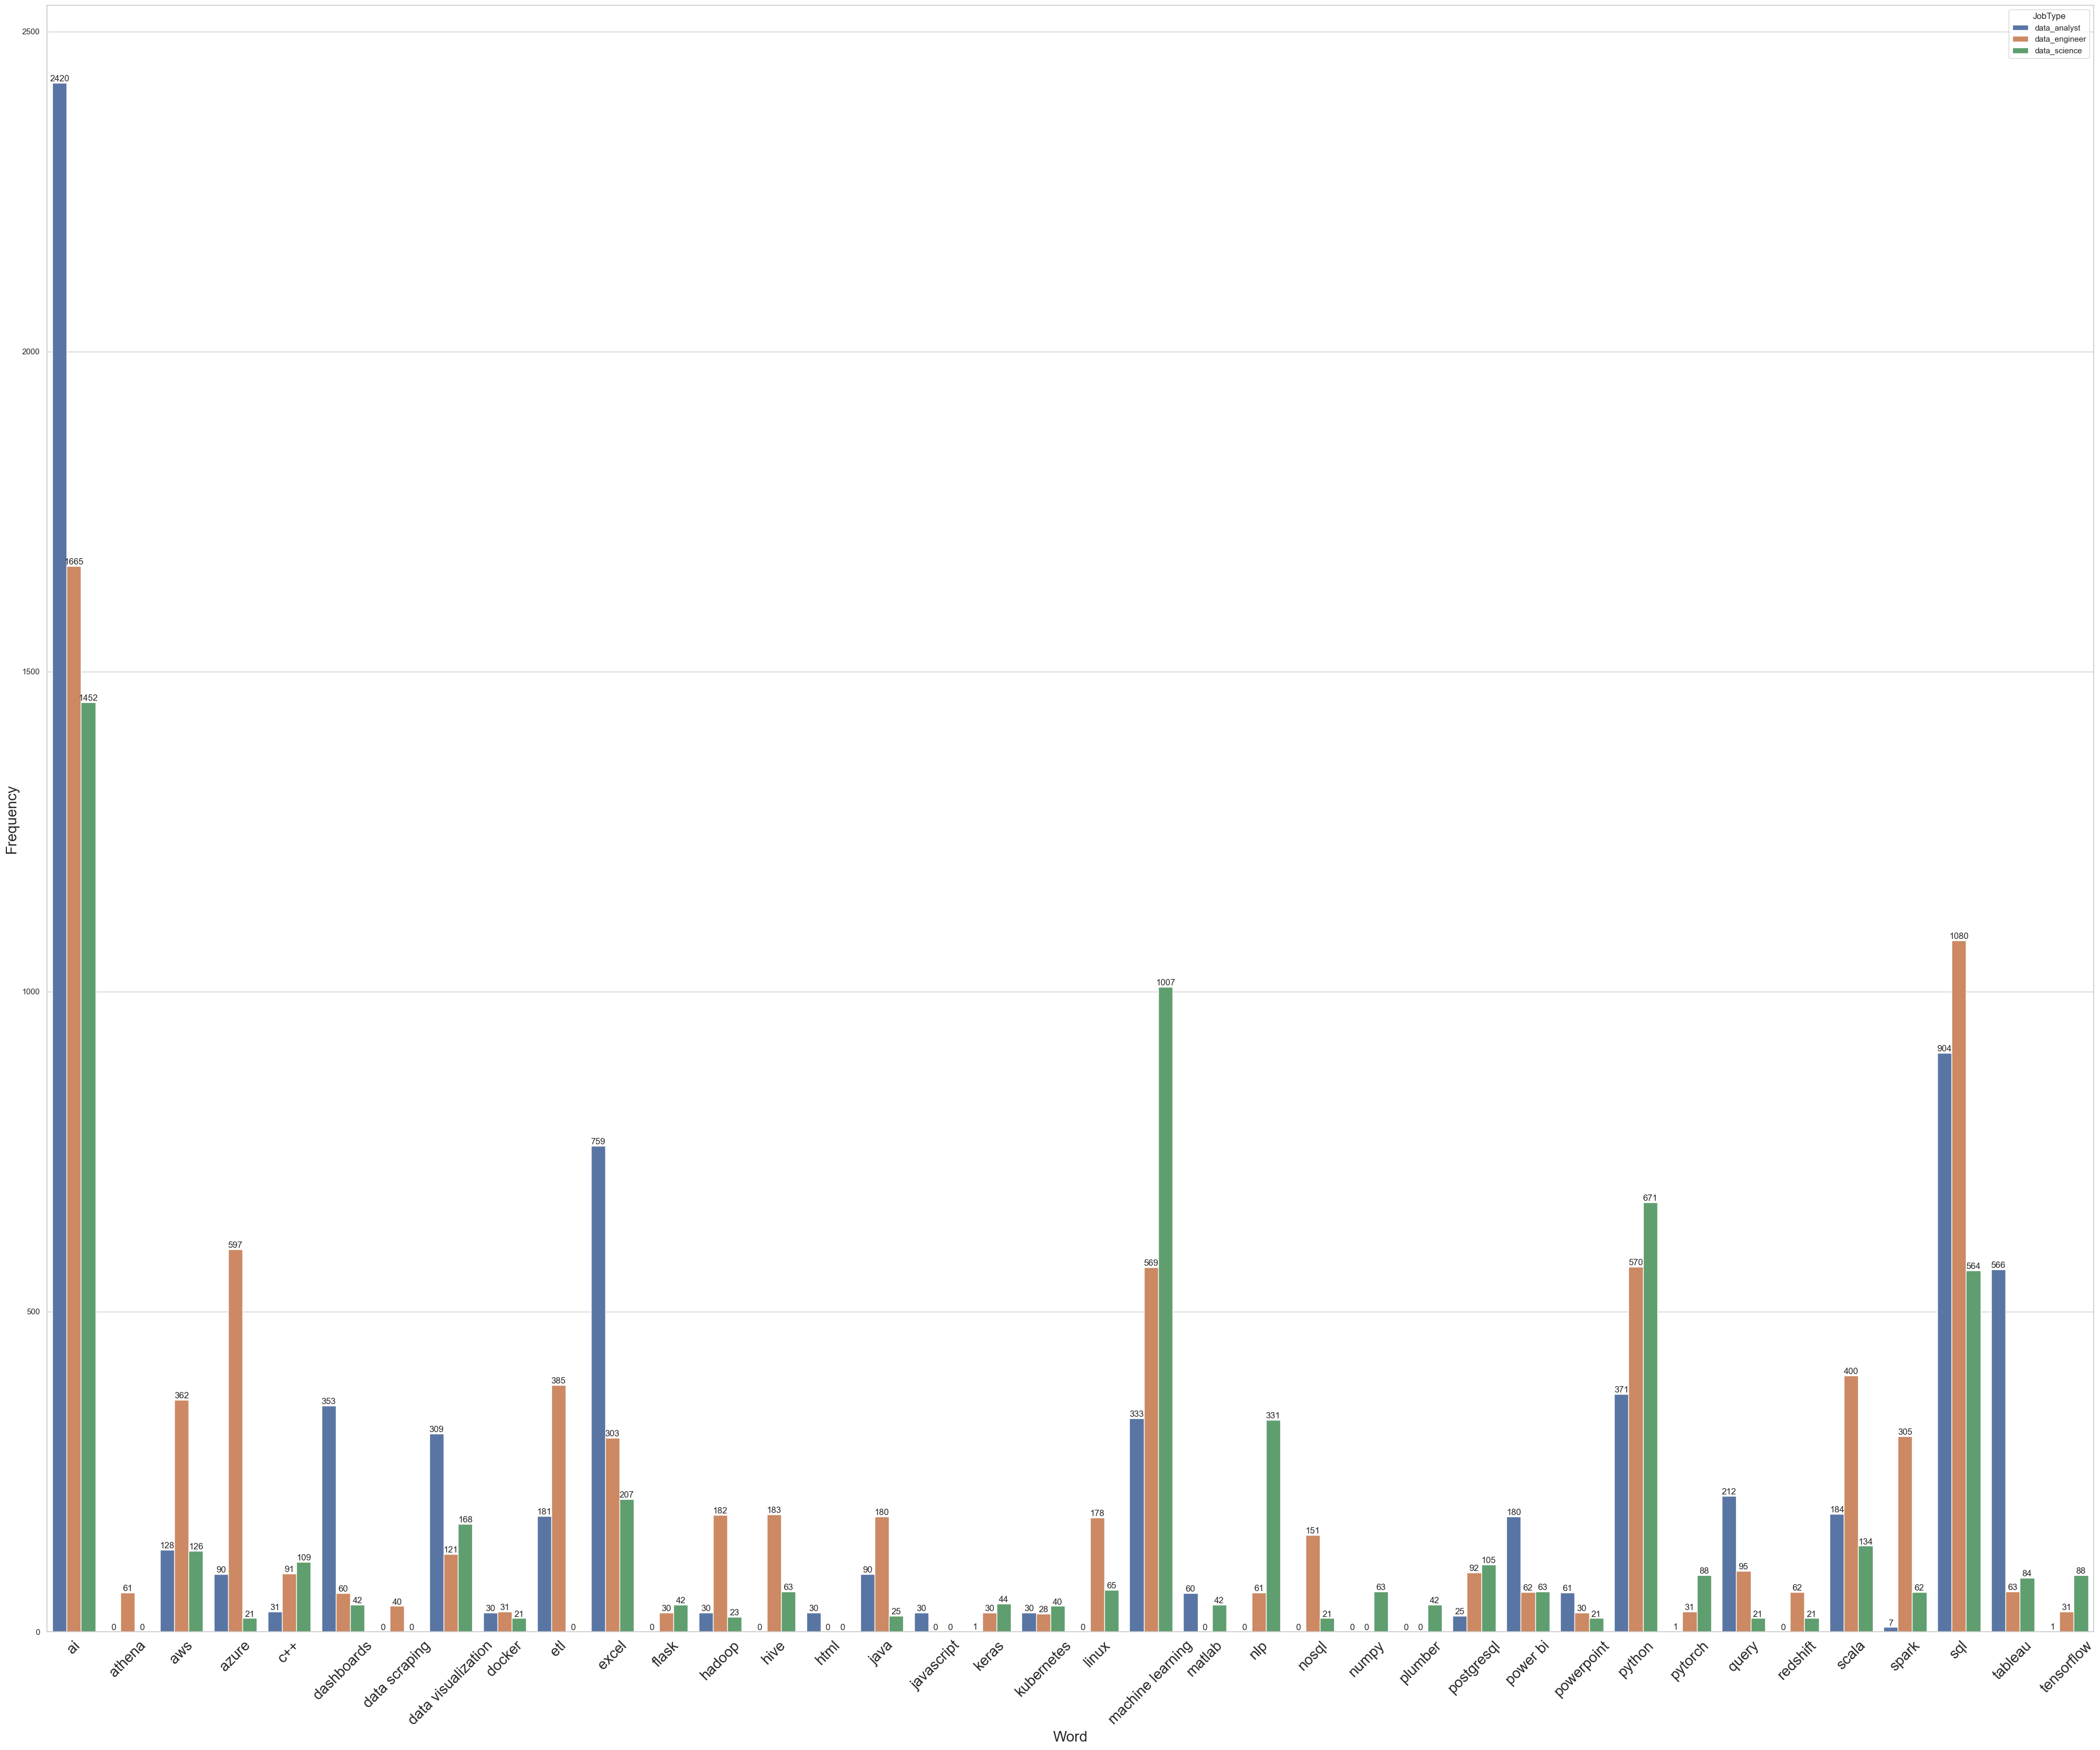

In [88]:
#group and sum frequency

grouped_data2 = dff2.groupby(['JobType', 'Word'], as_index=False)['Frequency'].sum()

sns.set(style="whitegrid")
plt.figure(figsize=(50, 40)) 
ax = sns.barplot(x='Word', y='Frequency', hue='JobType', data=grouped_data2)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Word',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(rotation=45,fontsize = 20)
plt.show() 